## Hyphothesis 5b: 
### The Alternative Portfolio will outperform Control Portfolio 1 and Control Portfolio 2 in 2020 for the selected thresholds: R=0.0, 0.05, 0.1, 0.15, 0.2

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from random import shuffle
import random
import seaborn as sns
import scipy
from scipy.stats import levene
from scipy.stats import ttest_ind
import scipy.stats as stats
from time import time


os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

In [3]:
%matplotlib notebook
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Import Price/Returns Data

In [4]:
df_price = pd.read_csv('data\\processed\\df_price07_20.csv')
df_return = pd.read_csv('data\\processed\\df_return7_20.csv')

df_price.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df_return.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

df_price.index = pd.to_datetime(df_price['date'])
df_return.index = pd.to_datetime(df_return['date'])

df_price = df_price.drop('date', axis=1)
df_return = df_return.drop('date', axis=1)


dfsp = df_price['SPX']

df_price = df_price.drop('SPX', axis=1)
df_return = df_return.drop('SPX', axis=1)

#### RETURNS: 8/2008-12/2008: S&P

In [5]:
return_sp08 = ((dfsp[dfsp.index=='2008-12-31'].values-dfsp[dfsp.index=='2008-09-02'].values)/dfsp[dfsp.index=='2008-09-02'].values)[0]
return_sp08

-0.29299926423394224

#### RETURNS: 2020: S&P

In [7]:
return_sp20 = ((dfsp[dfsp.index=='2020-03-31'].values-dfsp[dfsp.index=='2019-12-31'].values)/dfsp[dfsp.index=='2019-12-31'].values)[0]
return_sp20

-0.20001049282216687

### Company Symbols

In [8]:
companies = df_price.columns

### RETURNS: 8/2008-12/2008: PER COMPANY

In [9]:
worst_days_returns08 = {}
for symbol in companies:
    temp_end = df_price.loc['2008-12-31', symbol].values
    temp_start = df_price.loc['2008-08-29', symbol].values
    temp_ret = ((temp_end-temp_start)/temp_start)[0]
    worst_days_returns08[symbol] = temp_ret
worst_days_returns08['ORCL']

-0.19151846785225715

### Run Experiment

In [49]:
r_thresholds = [0, 0.05, 0.1, 0.15, 0.20] ## threshold value compared to market
portfolio_size = [25] ## number of stocks in each portfolio
n_samples = [10000]


experiment_df = pd.DataFrame([])

#pd.DataFrame(comparison_dic, index=['sample1'])

t0 = time()
for value in r_thresholds:
    """generate/sample symbols"""
    for size in portfolio_size:
        for sample_size in n_samples:
            n_bootstraps = sample_size
            for i in range(n_bootstraps):
                comparison_dic = {}
                #symbols_dic = {}
                
                alt_list = []
                control_list1 = []
                        
                for symbol in companies:
                    temp_series = worst_days_returns08[symbol]
                    if temp_series-return_sp08>value:
                        alt_list.append(symbol)
                    else:
                        control_list1.append(symbol)
              
                alt_symbols = random.sample(alt_list, size)
                control_symbols1 = random.sample(control_list1, size)
                control_symbols2 = random.sample(list(companies), size)
                
                ### Add the 
                comparison_dic['alt_symbols'] = [alt_symbols]
                comparison_dic['control_symbols1'] = [control_symbols1]
                comparison_dic['control_symbols2'] = [control_symbols2]
                

                ### Generage Beginning/End Prices of the portfolios
                alt_close19 = df_price.loc[:, alt_symbols].loc['2019-12-31', :]
                alt_close20 = df_price.loc[:, alt_symbols].loc['2020-03-31', :]
                                
                ctl1_close19 = df_price.loc[:, control_symbols1].loc['2019-12-31', :]
                ctl1_close20 = df_price.loc[:, control_symbols1].loc['2020-03-31', :]
                               
                ctl2_close19 = df_price.loc[:, control_symbols2].loc['2019-12-31', :]
                ctl2_close20 = df_price.loc[:, control_symbols2].loc['2020-03-31', :]
                
                ### generate returns
                alt_return20 = (alt_close20.sum().sum()-alt_close19.sum().sum())/alt_close19.sum().sum()
                ctl1_return20 = (ctl1_close20.sum().sum()-ctl1_close19.sum().sum())/ctl1_close19.sum().sum()
                ctl2_return20 = (ctl2_close20.sum().sum()-ctl2_close19.sum().sum())/ctl2_close19.sum().sum()


                #### Add values to comparison dictionary
                comparison_dic['CTL1_20'] = ctl1_return20
                comparison_dic['CTL2_20'] = ctl2_return20
                comparison_dic['ALT_20'] = alt_return20
              
                
                comparison_dic['r_value'] = value
                comparison_dic['sample_size'] = n_bootstraps
                comparison_dic['portfolio_size'] = size
                ### Add to the dataframe
                temp_df = pd.DataFrame(comparison_dic)
                experiment_df = pd.concat([experiment_df, temp_df])
        if sample_size % 500 == 0:
            print('{} complete'.format((value, size)))
            t1 = round((time()-t0)/60, 4)
            print('{} minutes have passed'.format(t1))

        
### CAPTURE THE VARIANCE OF THE RETURNS FOR EACH OF THE SYMBOLS        
        
experiment_df.head()

(0, 25) complete
4.8174 minutes have passed
(0.05, 25) complete
9.7275 minutes have passed
(0.1, 25) complete
14.0067 minutes have passed
(0.15, 25) complete
18.6359 minutes have passed
(0.2, 25) complete
23.6294 minutes have passed


,alt_symbols,control_symbols1,control_symbols2,CTL1_20,CTL2_20,ALT_20,r_value,sample_size,portfolio_size
0,"[JNJ, PEP, MO, CVS, JKHY, T, MMM, O, ALL, TSCO...","[MAR, FAST, RCL, ESS, DVN, NBL, NOC, ITW, IPG,...","[FRT, AIV, MNST, RE, UTX, NKE, IBM, ISRG, NTAP...",-0.290874,-0.255044,-0.220698,0.0,10000,25
0,"[UNH, BLL, LNT, BK, MMC, PBCT, PEG, CINF, MMM,...","[MCO, SWKS, CRM, M, TTWO, UHS, OMC, INTC, EIX,...","[PRGO, ALGN, ISRG, HCP, CI, CDNS, GL, ZBH, LB,...",-0.096580,-0.226422,-0.176014,0.0,10000,25
0,"[HUM, PEG, CB, DLR, MCD, VRTX, AMGN, ETR, ALL,...","[BA, CME, TXN, EXR, ADI, PXD, RL, XEC, UHS, PR...","[TROW, STZ, RJF, AVB, PH, TSCO, CPB, MCO, MO, ...",-0.342265,-0.244697,-0.162776,0.0,10000,25
0,"[GPC, CMG, PFE, UNH, CHRW, XOM, ALL, EFX, MTB,...","[APA, PFG, WDC, RCL, LNC, EIX, MOS, CME, NSC, ...","[KLAC, LDOS, GPC, MSFT, LUV, MHK, UNP, IBM, AI...",-0.326673,-0.227776,-0.220738,0.0,10000,25
0,"[SO, CTXS, LOW, GIS, CMCSA, PG, DRI, UAA, CPB,...","[ANSS, ADBE, HON, GRMN, IPG, AVY, ZBH, ITW, CT...","[PHM, HRB, FRT, MHK, TPR, PPG, FCX, XRAY, MLM,...",-0.165276,-0.342645,-0.174282,0.0,10000,25


In [50]:
comparison_df = experiment_df[['CTL1_20', 'CTL2_20', 'ALT_20', 'r_value', 'sample_size', 'portfolio_size']]
comparison_df.head()

,CTL1_20,CTL2_20,ALT_20,r_value,sample_size,portfolio_size
0,-0.290874,-0.255044,-0.220698,0.0,10000,25
0,-0.096580,-0.226422,-0.176014,0.0,10000,25
0,-0.342265,-0.244697,-0.162776,0.0,10000,25
0,-0.326673,-0.227776,-0.220738,0.0,10000,25
0,-0.165276,-0.342645,-0.174282,0.0,10000,25


In [58]:
alpha=0.05
z_critical = 1.645
hypothesis_df = pd.DataFrame([])

for r in r_thresholds:
    temp_dic = {}
    temp_df = comparison_df[comparison_df['r_value']==r]
    temp_ctl1 = temp_df['CTL1_20'] 
    temp_ctl2 = temp_df['CTL2_20'] 
    temp_alt = temp_df['ALT_20']

    ### Z - Test
    x_bar_alt = temp_alt.mean()
    x_bar_ctl1 = temp_ctl1.mean()
    x_bar_ctl2 = temp_ctl2.mean()
    std_error1 = np.sqrt(temp_alt.var()+temp_ctl1.var()-2*np.cov(temp_alt, temp_ctl1)[0][1])
    std_error2 = np.sqrt(temp_alt.var()+temp_ctl2.var()-2*np.cov(temp_alt, temp_ctl2)[0][1])    
    z_hat1 = (x_bar_alt-x_bar_ctl1-0)/std_error1
    z_hat2 = (x_bar_alt-x_bar_ctl2-0)/std_error2    
    ## Generate P-values
    p1 = 1-stats.norm.cdf(z_hat1)
    p2 = 1-stats.norm.cdf(z_hat2)
    
    ### Generate Upper/Lower Bounds
    t_lower1 = x_bar_alt-std_error1*z_critical
    t_lower2 = x_bar_alt-std_error2*z_critical    
    t_upper1 = x_bar_alt+std_error1*z_critical
    t_upper2 = x_bar_alt+std_error2*z_critical    

    ### Append Dataframe
    temp_dic['R-Threshold'] = r    
    temp_dic['x_bar_alt'] = x_bar_alt 
    temp_dic['lower1'] = t_lower1
    temp_dic['upper1'] = t_upper1
    temp_dic['P1A'] = p1
    temp_dic['H1A'] = ['Reject' if p1 < alpha else 'Accept']    
    temp_dic['lower2'] = t_lower2
    temp_dic['upper2'] = t_upper2
    temp_dic['P2A'] = p2
    temp_dic['H2A'] = ['Reject' if p2 < alpha else 'Accept']
    
    temp_df = pd.DataFrame(temp_dic)
    hypothesis_df = pd.concat([hypothesis_df, temp_df])

hypothesis_df.to_csv('plots\\h5b\\hypothesis_test_s10000_2.csv') 
hypothesis_df        

,R-Threshold,x_bar_alt,lower1,upper1,P1A,H1A,lower2,upper2,P2A,H2A
0,0.00,-0.204988,-0.324037,-0.085939,0.339389,Accept,-0.316197,-0.093779,0.414943,Accept
0,0.05,-0.201247,-0.319959,-0.082535,0.319374,Accept,-0.314532,-0.087963,0.396982,Accept
0,0.10,-0.179631,-0.286217,-0.073046,0.194837,Accept,-0.284855,-0.074407,0.266877,Accept
0,0.15,-0.187376,-0.290082,-0.084669,0.255421,Accept,-0.285696,-0.089055,0.298897,Accept
0,0.20,-0.180403,-0.278989,-0.081818,0.226033,Accept,-0.277383,-0.083424,0.253126,Accept


## $$For\thinspace each\thinspace  Threshold\thinspace  in\thinspace  the\thinspace Return\thinspace  Thresholds\thinspace$$<br> $$H^{1}_{0}: \mu_{a} = \mu_{ctl1} \hspace{1cm} H^{1}_{a}: \mu_{a} > \mu_{ctl1}$$<br><br>$$H^{2}_{0}: \mu_{a} = \mu_{ctl2} \hspace{1cm} H^{1}_{a}: \mu_{a} > \mu_{ctl2}$$

<IPython.core.display.Javascript object>


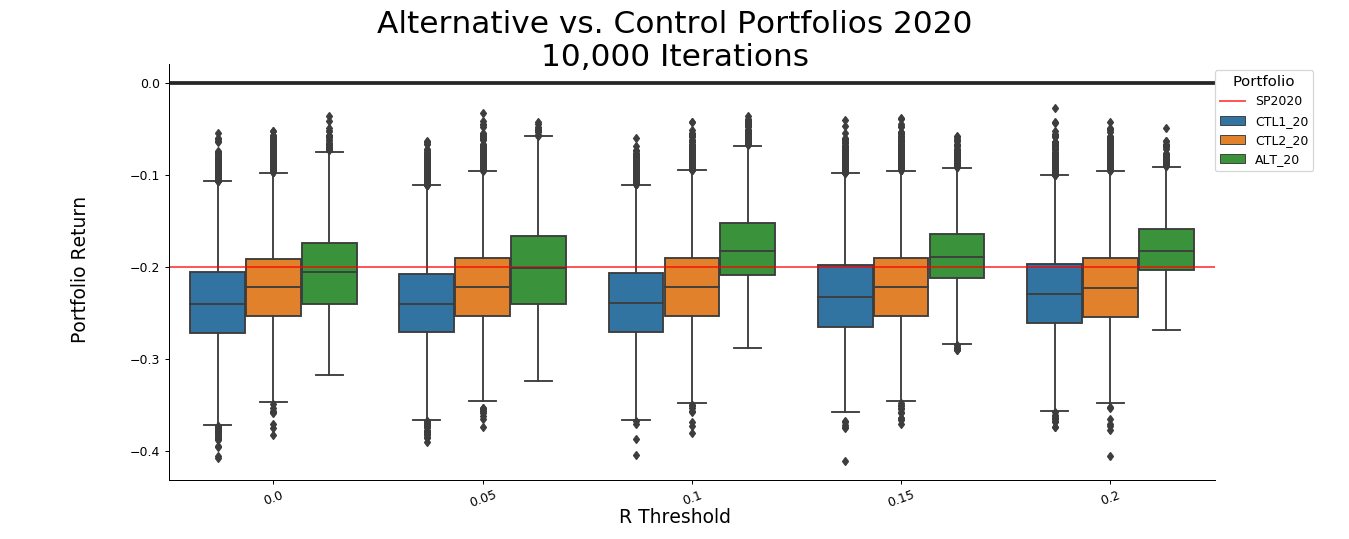

<IPython.core.display.Javascript object>


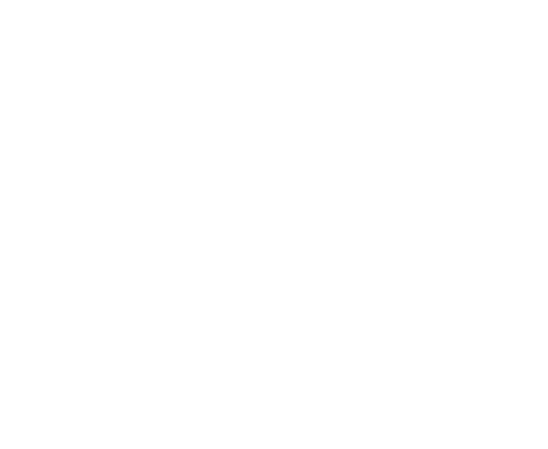

In [52]:
plot_boxplots(comparison_df)

In [47]:
def plot_boxplots(df):
    fig, ax = plt.subplots(figsize=(15,6))

    temp_df = df
    melted_df = pd.melt(temp_df,id_vars=['r_value', 'sample_size', 'portfolio_size'], value_vars=['CTL1_20', 'CTL2_20', 'ALT_20'],
                var_name = 'portfolio', value_name='returns')

    g = sns.catplot(ax=ax, data=melted_df, kind='box', x='r_value', y='returns', hue='portfolio', legend=True, legend_out=True)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('')        

    #ax.set_title('Samples={}, P_Size={}'.format(sample_size, p_size), fontsize=20)
    ax.tick_params(axis="x", rotation=20)
    ax.axhline(return_sp20, color='red', alpha=0.7, label='SP2020')
    ax.axhline(0, color='black', alpha=0.85, linewidth=3)
#     ax.set_ylim(-0.05, 0.05)

    legend = ax.legend(loc='upper right', bbox_to_anchor=(1.10,1), title='Portfolio', fontsize=10)
    legend.get_title().set_fontsize('12')


    fig.suptitle('Alternative vs. Control Portfolios 2020\n{:,} Iterations'.format(n_samples[0]), fontsize=25)
    fig.text(0.5, 0.04, 'R Threshold', ha='center', va='center', fontsize=15)
    fig.text(0.06, 0.5, 'Portfolio Return', ha='center', va='center', rotation=90, fontsize=15)
    fig.subplots_adjust(hspace=0.5)

    #plt.tight_layout()
    plt.close()
    plt.show()